# Equazioni Differenziali

In [60]:
import numpy as np
import matplotlib.pyplot as plt

## Equazioni Differenziali del Primo Ordine in Una Variabile

Una generale equazione differenziale del primo ordine con una variabile indipendente può essere espressa come:

$$
\frac{dx}{dt} = f(x,t)
$$

dove $t$ è la variabole indipendnete.



Vedremo diversi metodi con differente accuratezza. Per confronatre i risultati partiamo dalla stessa equazione differenziale:

$$
\frac{dx}{dt} = e^{-x} + cos(t)
$$

Risolveremo l'equazione per $t \in [0,10]$ con la condizione iniziale $x_0 = x(0) = 0$ 

In [61]:
# funzione per l'equazione differenziale ordinaria (Ordinary Differential Equation)
def fode(x, t):
    """
    Funzione fode(x) = e^-x + cos(t)
    """
    return np.exp(-x) + np.cos(t)

In [62]:
# parametri comuni a tutti i metodi: intervallo [a,b]. x di partenza = 0.
a  =  0.
b  = 10.
x0 =  0.

### Metodo di Eulero

Assumendo di conoscere il valore di $x$ al tempo $t$, $x(t)$, possiamo esprimere il valore di $x(t+h)$ attraverso uno sviluppo in serie di Taylor:
$$
\begin{eqnarray}
x(t+h) & = & x(t) + h \frac{dx}{dt} + \frac{1}{2} h^2 \frac{d^2x}{dt^2} + ... \\
       & = & x(t) + h f(x,t) + O(h^2).
\end{eqnarray}
$$

Trascurando i termini superiori dello sviluppo in serie abbiamo:
$$
x(t+h) = x(t) + h f(x,t),
$$
da cui possiamo calcolare il valore $x(t+h)$. Ripetendo l'operazione otteniamo il valore di $x(t)$ ad intervalli equispaziati, separati fra loro della distanza $h$. 

<IPython.core.display.Javascript object>


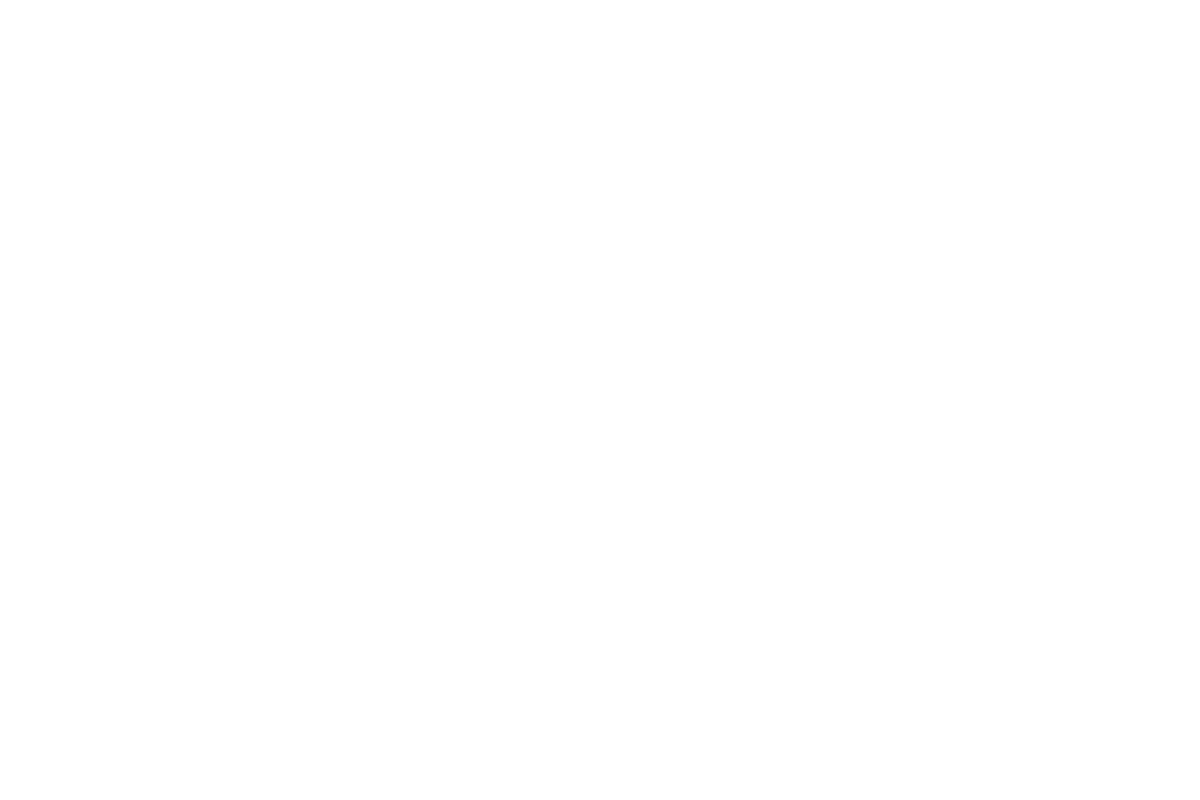

In [63]:
##########################################################################
#   Soluzione dell'equazione differenziale tramite il metodo di Eulero   #
##########################################################################

# Numero di punti utilizzati per la soluzione
N0 = 1000

# separazione fra i punti utilizzati per il calcolo della soluzione h = (b-a)/10 
h = (b-a)/N0

# Array di valori di t equispaziati 
tt = np.arange(a,b,h)

# Array vuoto per contenere i valori della soluzione x(t)
xx = np.empty(0)

# Condizione iniziale 
x = x0

# Ciclo per applicare il metodo di eulero iterativamente 
for t in tt:
    xx = np.append(xx, x)
    x+= h*fode(x,t)
    
# Grafico soluzione 
fig,ax = plt.subplots(figsize=(9,6))
plt.plot(tt,xx)
plt.title('Soluzione con metodo di Eulero - N={:d}'.format(N0), color='slategray')
plt.xlabel('t', fontsize=14)
plt.ylabel('x', fontsize=14)
plt.text(tt[0], 0.95*max(xx), r'$\frac{dx}{dt} = e^{-x} + cos(t)$', color='slategray',fontsize=14)
plt.show()

Esaminiamo l'effetto del numero di punti considerati $N$ e quindi del valore di $h= \frac{b-a}{N}$.

<IPython.core.display.Javascript object>


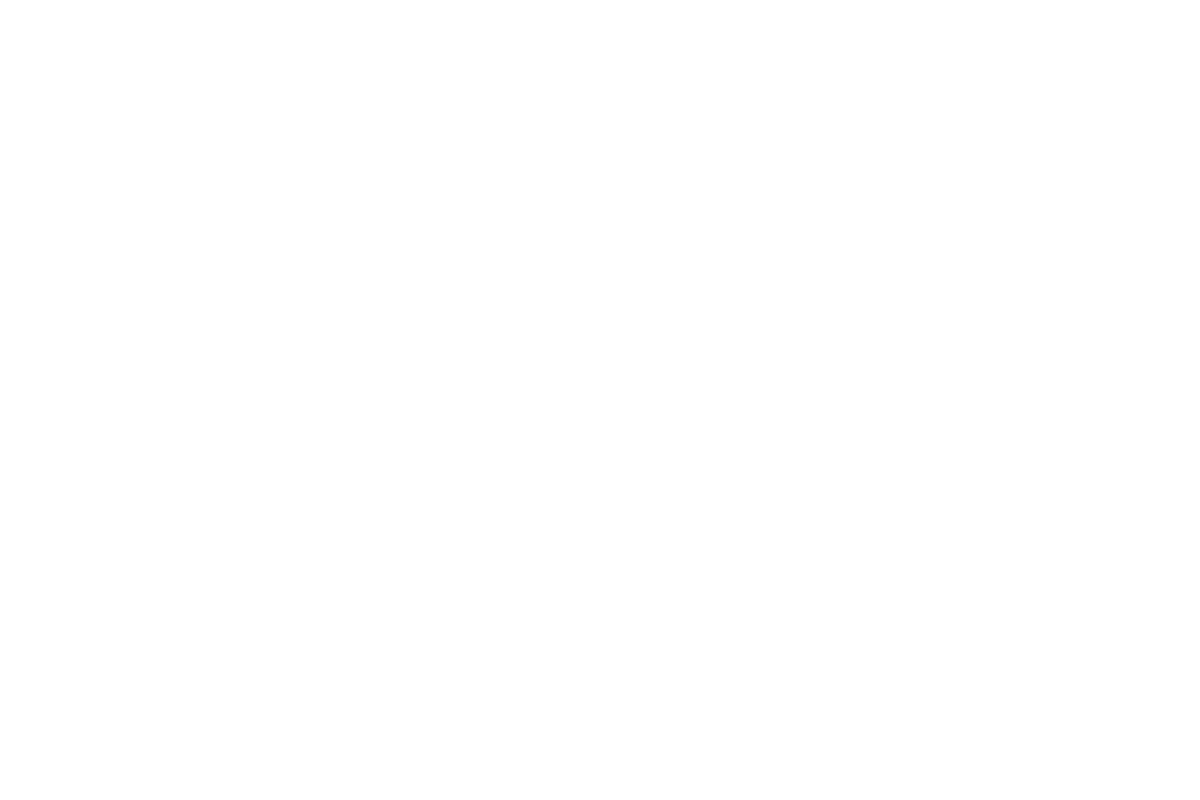

In [64]:
# Lista con diversi valori di N
NN = [10, 20, 100, 1000]

# Dizionari per le soluzioni con diversi N
xsol = {}
tsol = {}

# Ciclo for sui diversi valori di N
for n in NN: 
    h = (b-a)/n
 
    tt = np.arange(a,b,h)
    xx = np.empty((0,0))

    x = x0
    
    # Ciclo per applicare iterativamente il metodo di Eulero 
    for t in tt:
        xx = np.append(xx, x)
        x+= h*fode(x,t)
    
    # Aggiungo soluzioni ai dizionari
    xsol.update({n : xx})
    tsol.update({n : tt})
    
    

fig,ax = plt.subplots(figsize=(9,6))
plt.title('Metodo di Eulero', color='slategray', fontsize=14)
for n in NN:
    plt.plot(tsol[n],xsol[n], label='{:4d} punti'.format(n))

plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc='lower right', fontsize=14)
plt.text(tsol[10][0], 0.95*max(xsol[10]), r'$\frac{dx}{dt} = e^{-x} + cos(t)$', color='slategray',fontsize=14)
plt.show()

### Metodo di Runge-Kutta al Secondo Ordine

<IPython.core.display.Javascript object>


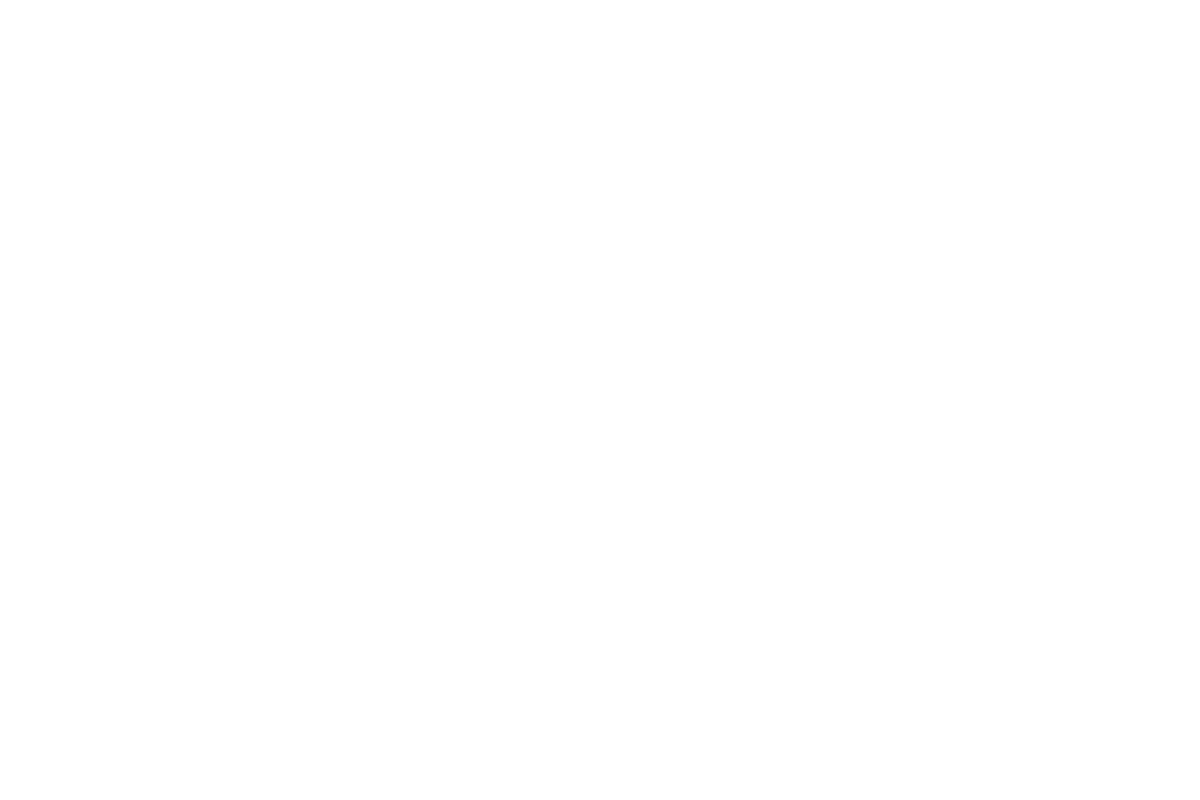

[]

In [65]:
## 
img,ax = plt.subplots(figsize=(9,6))
ax.plot(tsol[1000],xsol[1000], color='red')
ax.set_xlabel('t', fontsize=16)
ax.set_ylabel('x', fontsize=16)
ax.set_xticks([])
ax.set_yticks([])

<IPython.core.display.Javascript object>


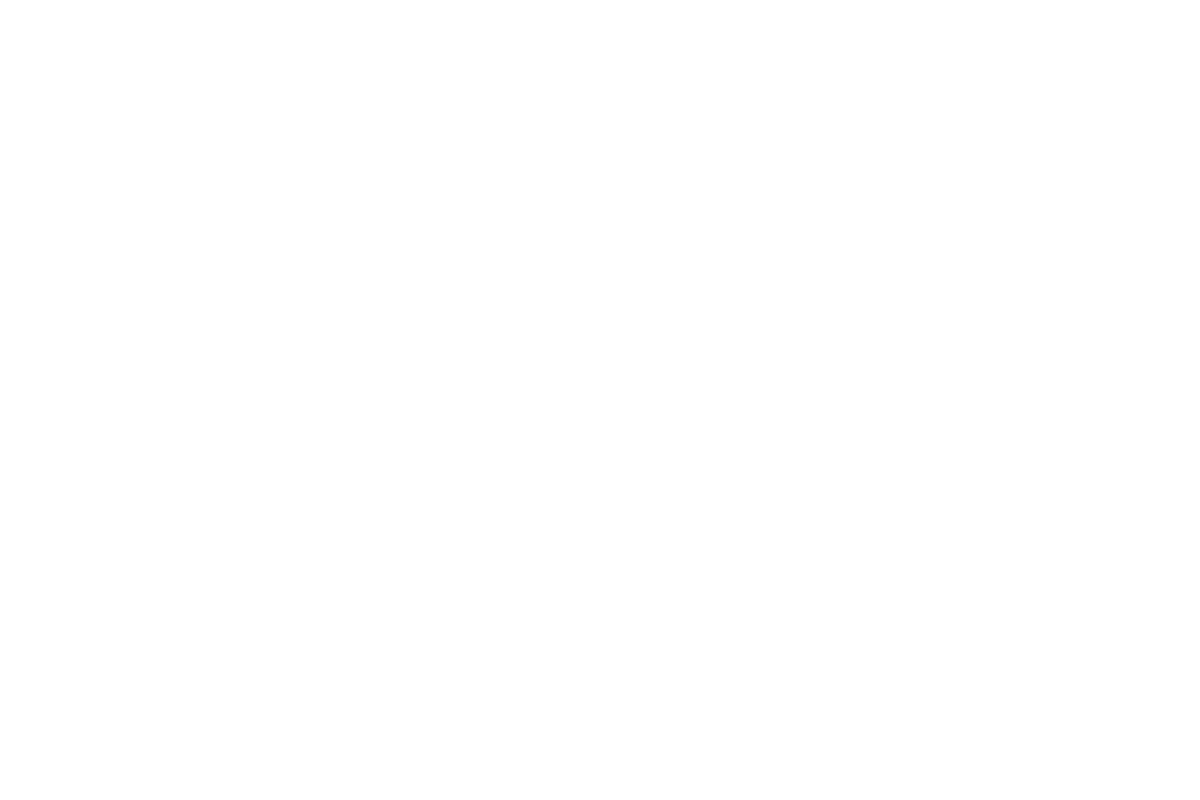

In [66]:
## 
slope_t   =  ( xsol[1000][101] - xsol[1000][99]  ) / (tsol[1000][101] - tsol[1000][99] )
slope_th2 =  ( xsol[1000][126] - xsol[1000][124] ) / (tsol[1000][126] - tsol[1000][124])

tder     = tsol[1000][50:150]
xder_t   = (tder-tsol[1000][100])* slope_t   + xsol[1000][100]
xder_th2 = (tder-tsol[1000][100])* slope_th2 + xsol[1000][100]

# 
img,ax = plt.subplots(figsize=(9,6))
#print(tsol[10])
ax.plot(tsol[1000],xsol[1000], color='red', linewidth=4)
ax.plot(tsol[1000][100], xsol[1000][100], 'o', color='royalblue', markersize=12,  label=r'$x(t_i)$')
ax.plot(tsol[1000][150], xsol[1000][150], 'o', color='orange',    markersize=12,  label=r'$x(t_i + h)$')
ax.plot(tder, xder_t,   '-', color='slateblue', linewidth=3, label=r'$\frac{dx}{dt}(t_i)$')
ax.plot(tder, xder_th2, '-', color='limegreen', linewidth=3, label=r'$\frac{dx}{dt}(t_i+\frac{h}{2})$')
ax.set_xlabel('t', fontsize=16)
ax.set_ylabel('x', fontsize=16)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-0.1, 4.5)
ax.set_ylim(0, 2.5)
#ax.set_xlim(-0.1, 2.5)
#ax.set_ylim(0, 1.)
ax.legend(fontsize=16, frameon=False)
plt.show()

Il metodo di Runge-Kutta del secondo ordine (RK2) consiste nell'estarpolare al punto $x(t+h)$ partendo dal valore $x(t)$, come per il metodo di Euloro, ma utilizzando la derivata al punto $t+\frac{h}{2}$.

Matematicamente possiamo estrapolare il valore di $x(t+h)$ e $x(t)$ da una espansione in serie attorno a $t+\frac{h}{2}$ considerando uno spostaento rispettivamente di $+\frac{h}{2}$ e $-\frac{h}{2}$:

$$
\begin{eqnarray}
x(t+h) & =  & x\left(t+\frac{h}{2}\right) 
+ \frac{1}{2} h   \left( \frac{dx}{dt}     \right)_{t+\frac{h}{2}} 
+ \frac{1}{8} h^2 \left( \frac{d^2x}{dt^2} \right)_{t+\frac{h}{2}} 
+ O(h^3),\\
x(t) & =  & x\left(t+\frac{h}{2}\right) 
- \frac{1}{2} h   \left( \frac{dx}{dt}     \right)_{t+\frac{h}{2}} 
+ \frac{1}{8} h^2 \left( \frac{d^2x}{dt^2} \right)_{t+\frac{h}{2}} 
+ O(h^3).\\
\end{eqnarray}
$$

Sottraendo i due termini otteniamo:
$$
\begin{eqnarray}
x(t+h) & = & x(t) + h \left( \frac{dx}{dt} \right)_{t+\frac{h}{2}} + O(h^3)\\
       & = & x(t) + h f\left( x\left(t+\frac{h}{2}\right), t+\frac{h}{2}\right) + O(h^3)
\end{eqnarray}
$$
dove il termine in $h^2$ è scomparso e l'errore è solo di ordine $O(h^3)$.

Di fatto il valore di $x\left(t+\frac{h}{2}\right)$ non è noto ma può essere estrapolato tramite il metodo di Eulero:
$$
x\left(t+\frac{h}{2}\right) = x(t) + \frac{1}{2} \;h \; f(x,t).
$$

Riassumendo il metodo di Runge-Kutta al secondo ordine si può applicare come segue:
$$
\begin{eqnarray}
k_1    & = & h \; f(x,t),\\
k_2    & = & h \; f\left(x+\frac{1}{2}k_1, t+\frac{1}{2}h\right),\\
x(t+h) & = & x(t) + k_2.\\
\end{eqnarray}
$$

Applichiamo il metodo RK2 per diverse suddivisioni dell'intervallo $(a-b)$. 

<IPython.core.display.Javascript object>


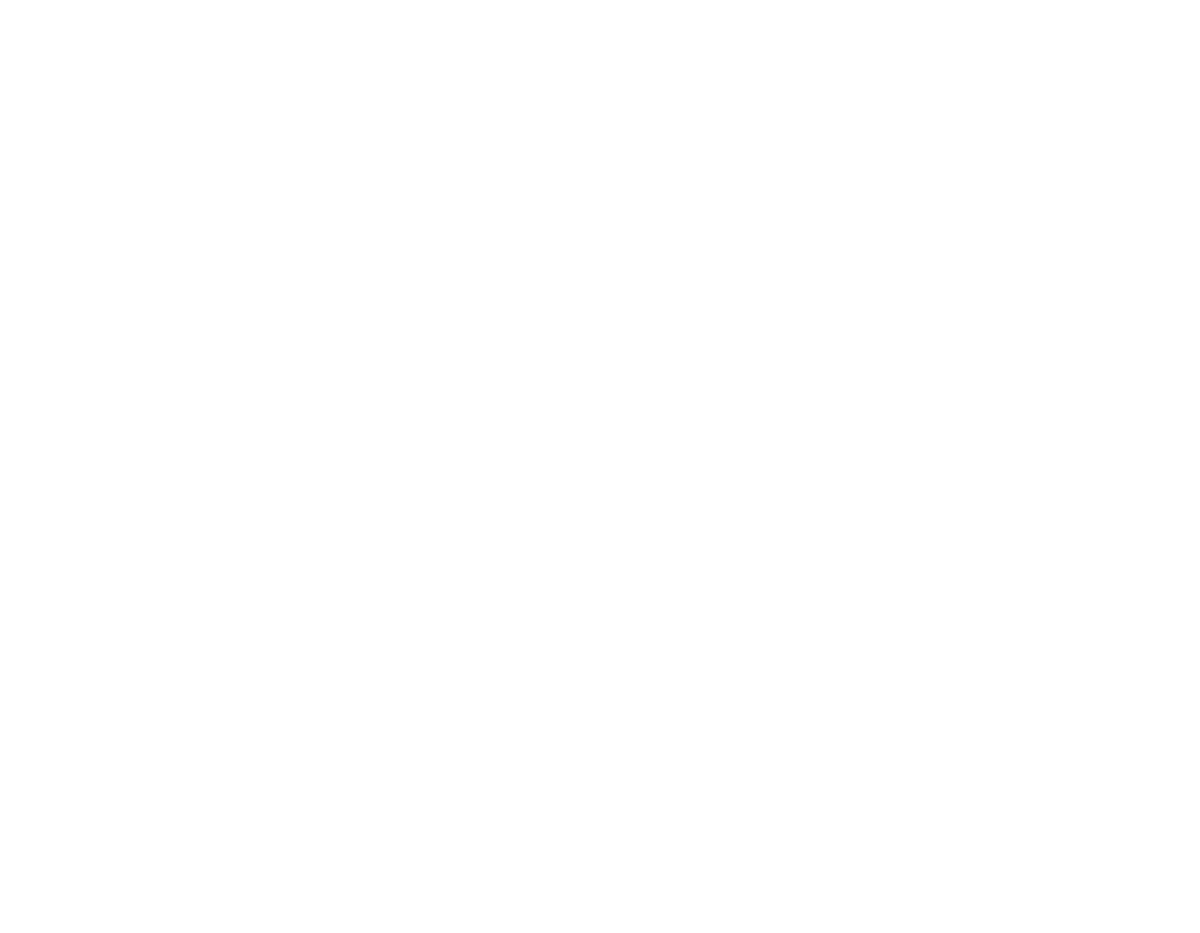

In [67]:
# Lista con diversi valori di N
NRK2 = [10, 20, 100, 1000]

# Dizionari soluzioni
xsolRK2 = {}
tsolRK2 = {}

# Ciclo su N
for n in NRK2: 
    
    h = (b-a)/n
    
    tt = np.arange(a,b,h)
    xx = np.empty((0,0))

    x = x0

    # Ciclo per applicare iterativamente il metodo RK2
    for t in tt:
        xx = np.append(xx, x)
        k1 = h*fode(x,t)
        k2 = h*fode(x+0.5*k1,t+0.5*h)
        x+= k2
    
    # Aggiungo soluzioni ai dizionari
    xsolRK2.update({n : xx})
    tsolRK2.update({n : tt})
    
    
# Grafico soluzioni
fig,ax = plt.subplots(figsize=(9,7))
plt.title('Metodo di Runge-Kutta al Secondo Ordine', color='slategray', fontsize=14)
for n in NN:
    plt.plot(tsolRK2[n],xsolRK2[n], label='{:4d} punti'.format(n))

plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc='lower right', fontsize=14)
plt.text(tsolRK2[10][0], 0.95*max(xsolRK2[10]), r'$\frac{dx}{dt} = e^{-x} + cos(t)$', color='slategray',fontsize=14)
plt.show()

### Metodo di Runge-Kutta al Quarto Ordine

Il metodo Runge-Kutta più usato è quello al quarto ordine (RK4) in cui si utilizzano sviluppi in serie attorno a diversi punti in modo che si cancellino anche i termini in $h^3$ e $h^4$. 

Il metodo RK4 può essere applicato come segue:

$$
\begin{eqnarray}
k_1    & = & h \; f(x,t),\\
k_2    & = & h \; f\left(x+\frac{1}{2}k_1, t+\frac{1}{2}h\right),\\
k_3    & = & h \; f\left(x+\frac{1}{2}k_2, t+\frac{1}{2}h\right),\\
k_4    & = & h \; f\left(x+k_3,            t+h           \right),\\
x(t+h) & = & x(t) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4).\\
\end{eqnarray}
$$

<IPython.core.display.Javascript object>


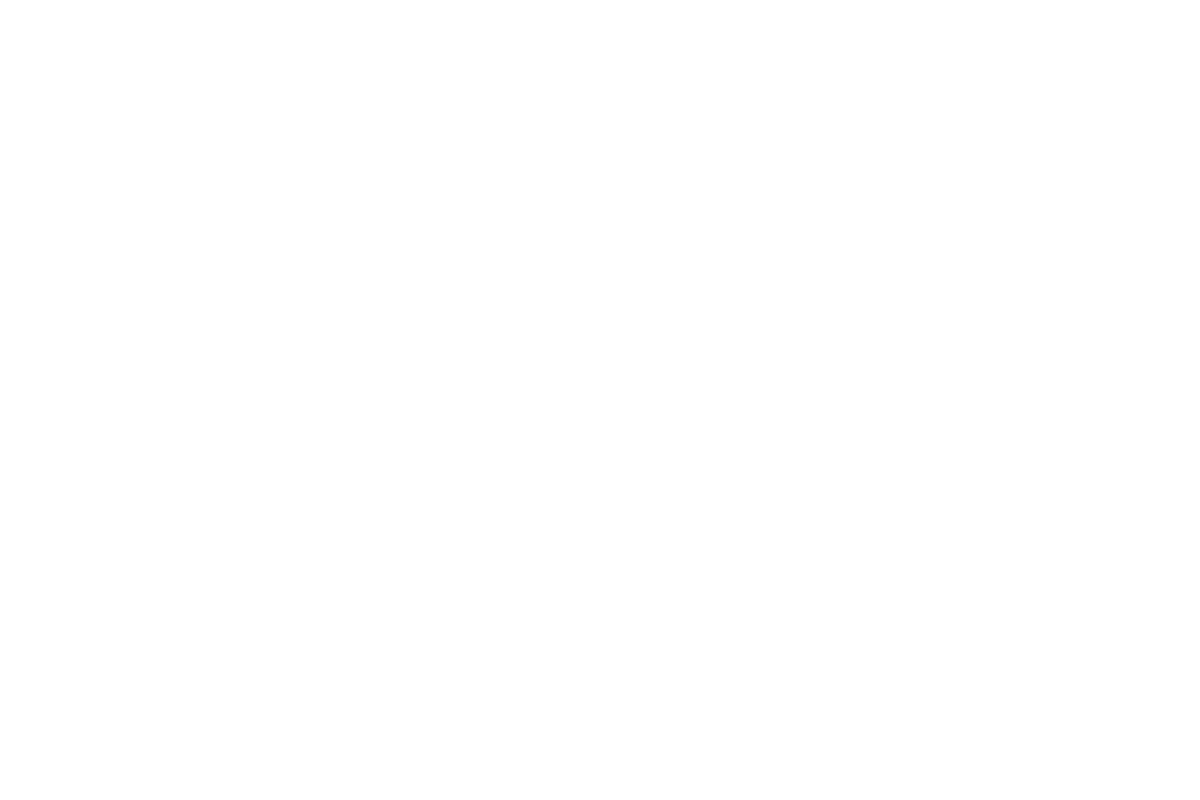

In [68]:
# Lista con diversi valori di N
NRK4 = [10, 20, 100, 1000]

# Dizionari 
xsolRK4 = {}
tsolRK4 = {}

# Ciclo per diversi N
for n in NRK4: 
    h = (b-a)/n

    tt = np.arange(a,b,h)
    xx = np.empty((0,0))

    x = x0

    # Ciclo per applicare iterativamente il metodo RK4 
    for t in tt:
        xx = np.append(xx, x)
        k1 = h*fode(x,t)
        k2 = h*fode(x+0.5*k1,t+0.5*h)
        k3 = h*fode(x+0.5*k2,t+0.5*h)
        k4 = h*fode(x+k3,t+h)
        x += (k1+k1*2+k3*2+k4)/6 
        
    # Aggiungo soluzioni ai dizionari
    xsolRK4.update({n : xx})
    tsolRK4.update({n : tt})
    
    
# Grafico soluzioni
fig,ax = plt.subplots(figsize=(9,6))
plt.title('Metodo di Runge-Kutta al Quarto Ordine', color='slategray', fontsize=14)
for n in NN:
    plt.plot(tsolRK4[n],xsolRK4[n], label='{:4d} punti'.format(n))

plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc='lower right', fontsize=14)
plt.text(tsolRK4[10][0], 0.95*max(xsolRK4[10]), r'$\frac{dx}{dt} = e^{-x} + cos(t)$', color='slategray',fontsize=14)
plt.show()

### Scipy ODE  

`scipy` ha diversi  metodi per rislovere le equazioni differenziali ordinarie o Ordinary Differential Equation (ODE) in inglese.

Sebbene sia possibile scegliere il metodo per la soluzione il modulo più immediato è `scipy.integrate.odeint` che utilizza una combinazione avanzata di metodi. 

In [69]:
from scipy import integrate

<IPython.core.display.Javascript object>


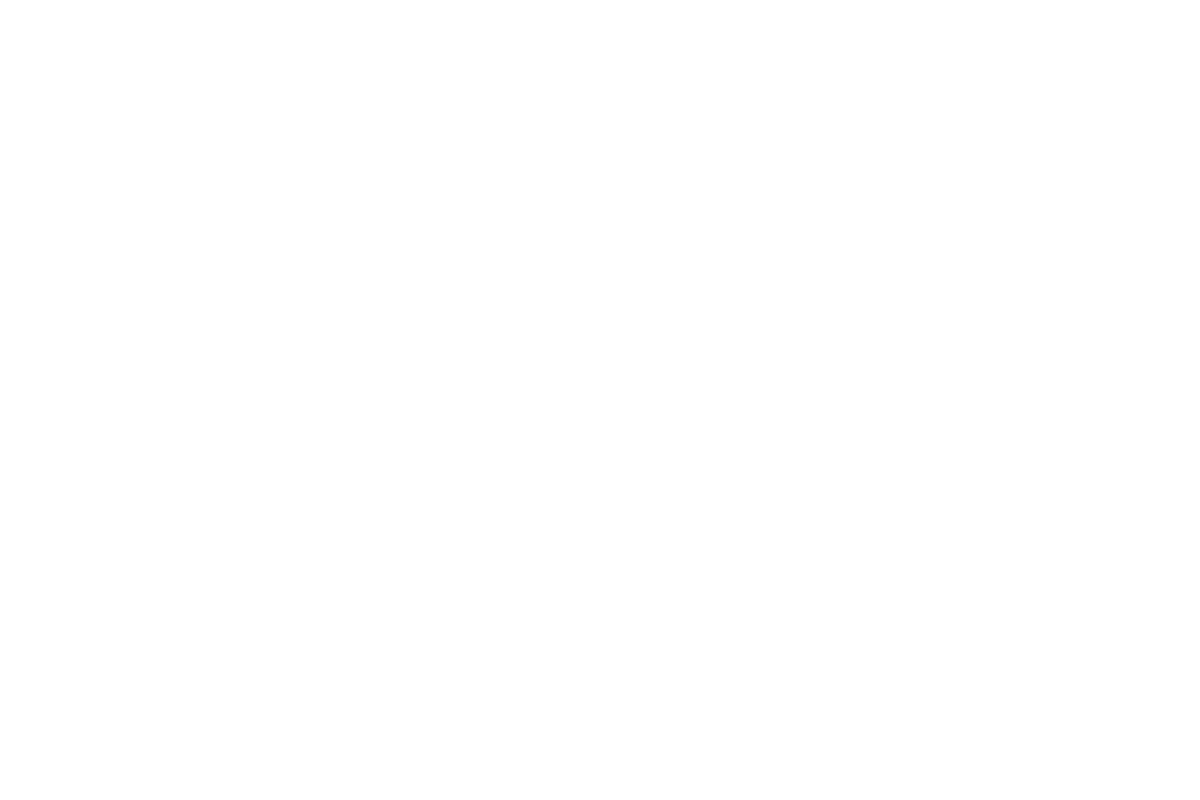

In [70]:
# Lista con diversi valori del numero di punti N
Nsp = [10, 20, 100, 1000]

# Diszionari per soluzioni
xsolsp = {}
tsolsp = {}

# Ciclo diversi valori di N
for n in Nsp: 
    h = (b-a)/n

    tt = np.arange(a,b,h)
    xx = np.empty((0,0))

    x = x0

    # Calcolo solzuine tramite scipy.integrate.odeint
    xx = integrate.odeint(fode, y0=x0, t=tt)
       
    # Aggiunta delle soluzioni al dizionario
    xsolsp.update({n : xx})
    tsolsp.update({n : tt})
    
    
# Grafico delle soluzioni
fig,ax = plt.subplots(figsize=(9,6))
plt.title('scipy.integrate.odeint ', color='slategray', fontsize=14)

for n in Nsp:
    plt.plot(tsolsp[n],xsolsp[n], label='{:4d} punti'.format(n))

plt.xlabel('t')
plt.ylabel('x')
plt.legend( fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.text(tsolsp[10][0], 0.95*max(xsolsp[10]), r'$\frac{dx}{dt} = e^{-x} + cos(t)$', color='slategray',fontsize=14)
plt.show()

### Equazioni Differenziali a più Variabili

Nel caso di equazioni differenziali simultanee in cui ci sia sempre una sola variabile indipendente ($t$), ad esempio:

$$
\begin{eqnarray}
\frac{dx}{dt} & = & x - 0.5 xy\\
\frac{dy}{dt} & = & 0.5 xy - y,\\
\end{eqnarray}
$$

utilizzando la notazione vettoriale dove ${\bf r} = (x,y,...)$ è un vettore di componenti $x$, $y$, .. e ${\bf f} ({\bf r},t) = ( f_x({\bf r}), f_y({\bf r}),...)$ una funzione vettoriale, possiamo ridefinire le equazioni simultanee come un'unica equazione vettoriale:

$$
\frac{d {\bf r}}{dt} = {\bf f}({\bf r}, t ).
$$


Continuando con lo stesso formalismo vettoriale la soluzione può essere ricavata tramite il metodo Runge-Kutta del quarto ordine:

$$
\begin{eqnarray}
{\bf  k}_1  & = & h {\bf f}({\bf r}, t) \\
{\bf  k}_2  & = & h {\bf f}({\bf r} +\frac{1}{2}{\bf  k}_1, t + \frac{1}{2}h) \\
{\bf  k}_3  & = & h {\bf f}({\bf r} +\frac{1}{2}{\bf  k}_2, t + \frac{1}{2}h) \\
{\bf  k}_4  & = & h {\bf f}({\bf r} +\frac{1}{2}{\bf  k}_3, t + h) \\
{\bf r}(t+h) & = & {\bf r}(t) + \frac{1}{6} ({\bf  k}_1 + 2 {\bf  k}_2 + 2 {\bf  k}_3 + {\bf  k}_4) \\
\end{eqnarray}
$$

In `python` possono essere risolte applicando direttamente il calcolo per vettori (array) per cui si definisce una funzione che accetti in input un verttore $r$ con le compnenti $(r[0]=x, r[1]=y, r[2]=z,...)$ e restuisca un array $drdt$ con le componenti  $(drdt[0]=\frac{dx}{dt}, drdt[1]=\frac{dy}{dt}, drdt[2]=\frac{dz}{dt}, ...)$ . 

Utilizzando i metodi di `scipy.integrate.odeint` possiamo risolvere le equazioni definite sopra.

In [71]:
# definisco funzione con componenti x, y
def fsimode(r, t):
    """
    fsimode(r, t)
    funzione per equazioni differnziali combinate f(fx,fy)
    dx/dt = fx(x,y,t)
    dy/dt = fy(x,y,t)
    
    parametri:
    r : (x,y)
    t : tempo
    return [dx/dt, dy/dt]
    """
    dxdt = r[0] -0.5*r[0]*r[1]
    dydt = 0.5*r[0]*r[1] - 2*r[1]
    drdt = [dxdt, dydt]
    return drdt

In [72]:
# definisco condizioni iniziali e intervallo temporale
r0 = [100, 0.1]

time = np.linspace(0, 20, 1000)


In [73]:
# soluzione
rsol = integrate.odeint(fsimode, r0, time )
#print(rsol)

<IPython.core.display.Javascript object>


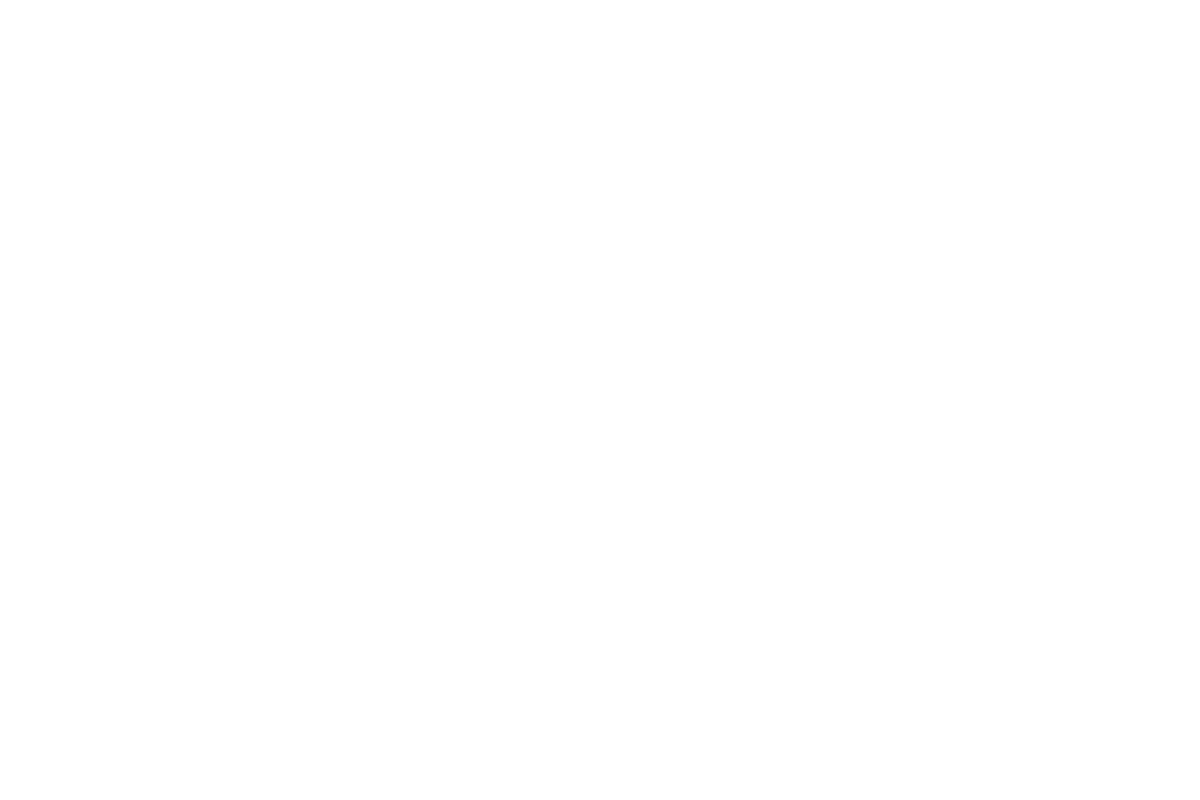

Text(0, 0.5, 'x/y')

In [74]:
# grafico risultati
fig,ax = plt.subplots(figsize=(9,6))
plt.plot(time, rsol[:,0], label='x')
plt.plot(time, rsol[:,1], label='y')
plt.legend(fontsize=14)
plt.yscale('log')
plt.xlabel('time')
plt.ylabel('x/y')

### Equazioni Differenziali del Secondo Ordine

Le equazioni differenziali di ordini superiori al primo possono essere risolte sfruttando la tecnica utilizzata per quelle a più variabili in cui le derivate rispetto alla variabile indipendente vengono considerate come altre variabili. 

Ad esempio un equazione differenziale al secondo ordine può essere espressa come:

$$
\frac{d^2x}{dt^2} = f\left(x,  \frac{dx}{dt}, t \right),
$$

definendo:

$$
 \frac{dx}{dt} = y
$$

da cui l'equazione iniziale diviene:

$$
\frac{dy}{dt} = f( x,y,t )
$$

ed applicare la tecnica utilizzata per le variabili simultanee, per cui l'equazione del secondo ordine  iniziale:

$$
\frac{d^2x}{dt^2} = f\left(x,  \frac{dx}{dt}, t \right),
$$

diventa il sistema di equazioni del primo ordine:

$$
\begin{cases}
\begin{eqnarray}
\frac{dx}{dt} & = & y \\
\frac{dy}{dt} & = & f( x,y,t ) \\
\end{eqnarray}
\end{cases}
$$

#### Oscillazione attenuata molla
Come esempio possiamo pendere l'equazione per il moto di una molla con oscillazioni attenuate:
$$
m \frac{d^2x}{dt^2} = -kx -C  \frac{dx}{dt}
$$

dove $k$ è la costante eleastica della molla e $C$ la costante legata alla dissipazione interna della molla.

Definendo:  
$$
\gamma = \frac{C}{2m}
$$

e 
$$
\omega_0^2 = \frac{k}{m}
$$

possiamo riformulare l'equazione differenziale come:
$$
\frac{d^2x}{dt^2} +2\gamma \frac{dx}{dt} + \omega_0^2 x = 0
$$


Per risolvere con `scipy` bisogna esprimere l'equazione al secondo ordine come un sistema di due equazioni al primo ordine per $x$ e $x'$ con $x'=y$:

$$
\begin{cases}
\begin{eqnarray}
\frac{dx}{dt} & = &  y  \\
\frac{dy}{dt} & = &  -2\gamma y - \omega_0^2 x \\
\end{eqnarray}
\end{cases}
$$


In [75]:
m_molla  = 0.5 # kg
k_molla  = 2  # N/m
c_visc   = 0.4  # N s/m

In [76]:
# Costanti dell'equazione
gamma  = c_visc / (2 * m_molla * np.sqrt(k_molla/m_molla))
omega0 = np.sqrt(k_molla/ m_molla)

def drdt_molla(r, t, g, o):
    """
    drdt_molla(r, t, g, o) derivate per equazine differenziale del moto oscillante attenuato di una molla 
    r : vettore con variabili r(x,dx/dt)
    t : variabile tempo
    g : costante gamma = C/(2m) [C: costante di attenuazione, m: massa molla]
    o : omega = k/m [k: costante eleastica molla]
    """
    dxdt = r[1]
    dydt = -2 * g * r[1] - o**2 *r[0]
    return (dxdt, dydt)

In [77]:
# Array tempi
time_vec = np.linspace(0, 10, 100)

# Condizioni iniziali (x=1, y=dx/dt=0) 
yinit = (1, 0)

# Soluzione tramite scipy.integrate.odeint
#   notare come i parametri aggiuntivi oltre alle coordiante e al tempo 
#    corrispndneti a gamma e omega0 vengano passsati  con  args=(gamma, omega0)
yarr  = integrate.odeint(drdt_molla, yinit, time_vec, args=(gamma, omega0))

<IPython.core.display.Javascript object>


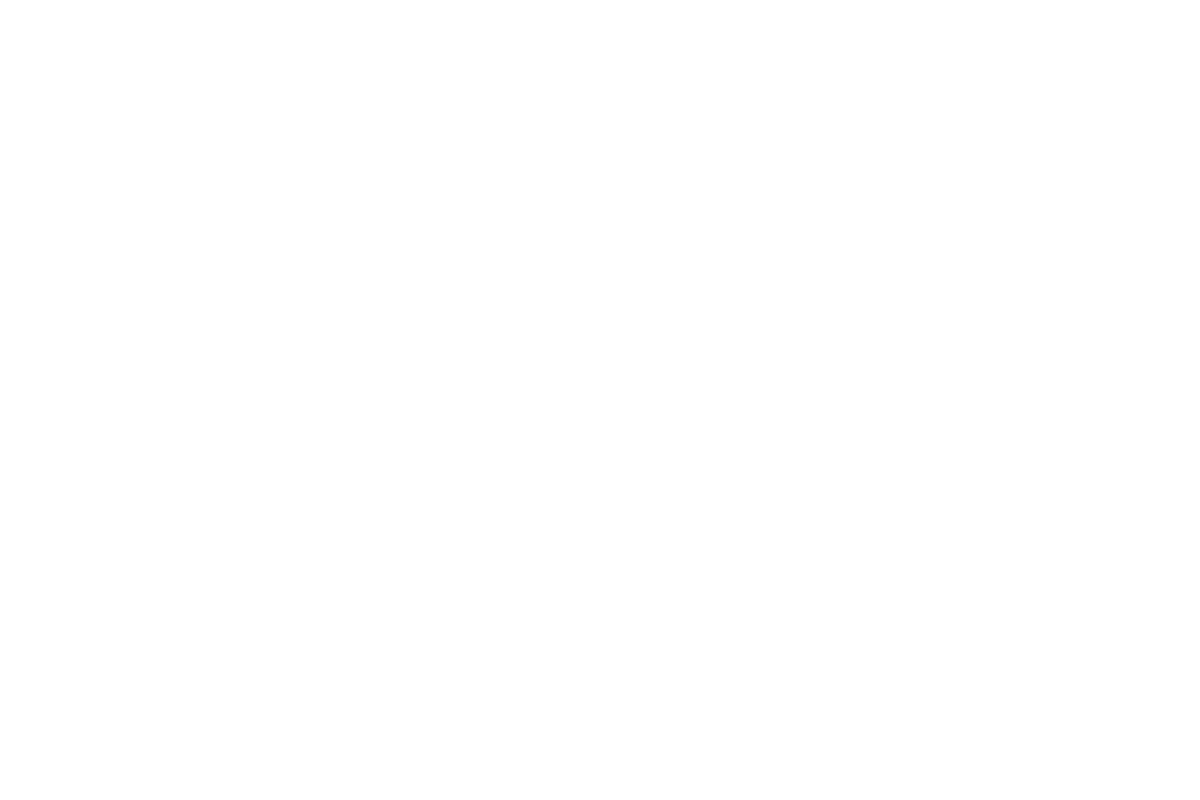

In [78]:
# Grafico Soluzione
fig,ax = plt.subplots(figsize=(9,6))
plt.plot(time_vec,  yarr, label=('x', 'v'))
plt.legend(fontsize=14)
plt.show()

### Passo Variabile

Come nel caso della soluzione di integrali numerici, si possono sviluppare dei metodi che adattino un passo variabile ad esempio stabilendo un errore massimo da compiere ad ogni passo. Questi metodi, detti *adattivi*, prevedono di valutare l'errore compiuto e poi adattare il passo di cosneguenza.

## Esempi

#### Comete

Come primo esempio analizziamo l'orbita di una cometa nel sisstema solare.

$$
m \frac{d^2 {\bf r}}{dt^2} = - \frac{GMm}{r^2} \cdot \frac{ {\bf r}}{r}
$$

$ M$ massa solare $m$ massa della cometa e $G$ costante di Newton.

Possiamo trascurare la componente $z$ sapendo che il moto è planare. Semplificando $m$ otteniamo per le coordinate $x$ e $y$:

$$
\begin{eqnarray}
\frac{d^2x}{dt^2} & = &  -G M \frac{x}{r^3}  \\
\frac{d^2y}{dt^2} & = &  -G M \frac{y}{r^3}  \\
\end{eqnarray}
$$

dove 

$$
r = \sqrt{x^2 + y^2}.
$$

Sulla falsariga di quanto fatto per l'oscillatore smorzato (in una dimensione), la soluzione in due dimensioni  può essere trovata ridefinendo il sistema di due equazioni del secondo  ordine come un sistema di quattro equazioni del primo ordine:

$$
\begin{cases}
\begin{eqnarray}
\frac{dx}{dt} & = &  w  \\
\frac{dy}{dt} & = &  z  \\
\frac{dw}{dt} & = &  -G M \frac{x}{\left(x^2+y^2\right)^{\frac{3}{2}}} \\
\frac{dz}{dt} & = &  -G M \frac{y}{\left(x^2+y^2\right)^{\frac{3}{2}}} \\
\end{eqnarray}
\end{cases}
$$



In [79]:
import scipy.constants

Ms = 1.98e30 #kg
mc = 1.0e12  #kg

In [80]:
def comet_drdt(vv, t, M):
    """
    comet_drdt(vv, t, M) funzione per soluzione equazione differenziale per le orbite delle comete
    vv = (x,y, x', y'): vettore con coordinate (e veloctà) 
    t                 : tempo
    M                 : Massa corpo centrale (Sole) 
    """
    G = scipy.constants.G
    rd = np.sqrt(vv[0]**2 + vv[1]**2) # radial distance
    dxdt = vv[2]
    dydt = vv[3]
    dvxdt = -G*M*vv[0]/rd**3
    dvydt = -G*M*vv[1]/rd**3
    
    return (dxdt, dydt, dvxdt, dvydt)
    
    

In [81]:
# Condizioni iniziali 
x0 = 4e12 # m
y0 = 0

vx0 = 0
vy0 = 500 # m/s

In [82]:
# Vettore con tempi
time = np.linspace(0, 3e9, 100000)

# Ntupla con condizioni iniziali
rinit = (x0, y0, vx0, vy0)

# Soluzione Eqyazione Differenziale
#   notare come il parametro aggiuntivo oltre alle coordiante e al tempo 
#    corrispndnete alla massa solare Ms venga passsato con  args=(Ms,)
r_solved  = integrate.odeint(comet_drdt, rinit, time, args=(Ms,))

<IPython.core.display.Javascript object>


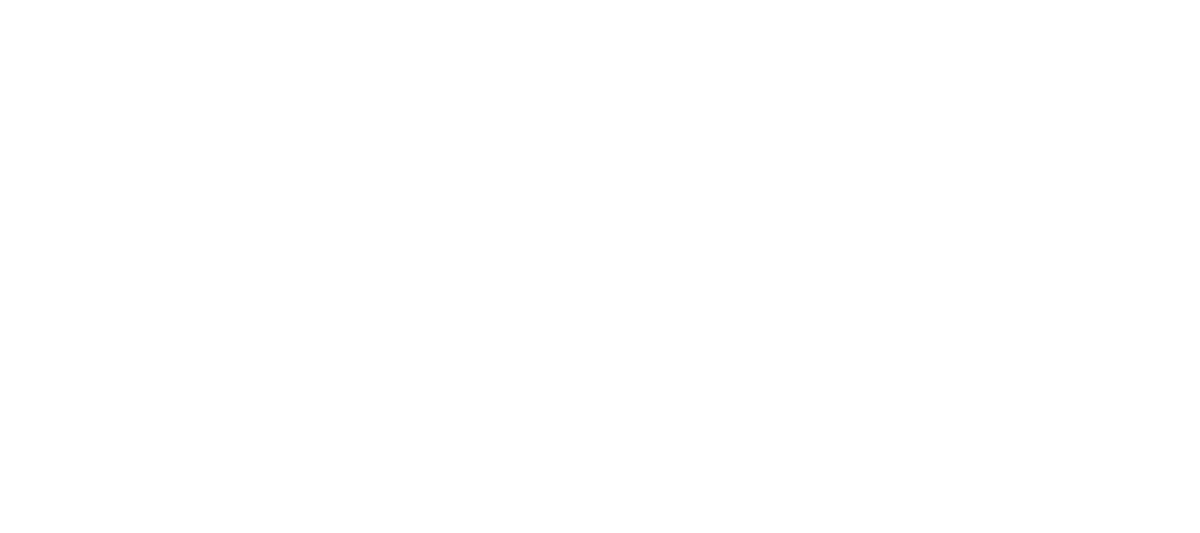

In [83]:
# Grafico Soluzione
fig,ax = plt.subplots(1,2, figsize=(9,4))
ax[0].plot(r_solved[:,0]/1000, r_solved[:,1]/1000, 'o', markersize=0.5, color='darkorange')
ax[0].set_xlabel('x [km]' )
ax[0].set_ylabel('y [km]' )
ax[0].set_xlim(-0.1e9, 4.1e9 )
ax[0].set_ylim(-2.1e9, 2.1e9 )
ax[1].plot(r_solved[:,2]/1000, r_solved[:,3]/1000, 'o', markersize=1, color='tomato')
ax[1].set_xlabel(r'$v_x$ [km/s]' )
ax[1].set_ylabel(r'$v_y$ [km/s]' )
ax[1].set_xlim(-80, 80)
ax[1].set_ylim(-150, 10 )
plt.show()

<IPython.core.display.Javascript object>


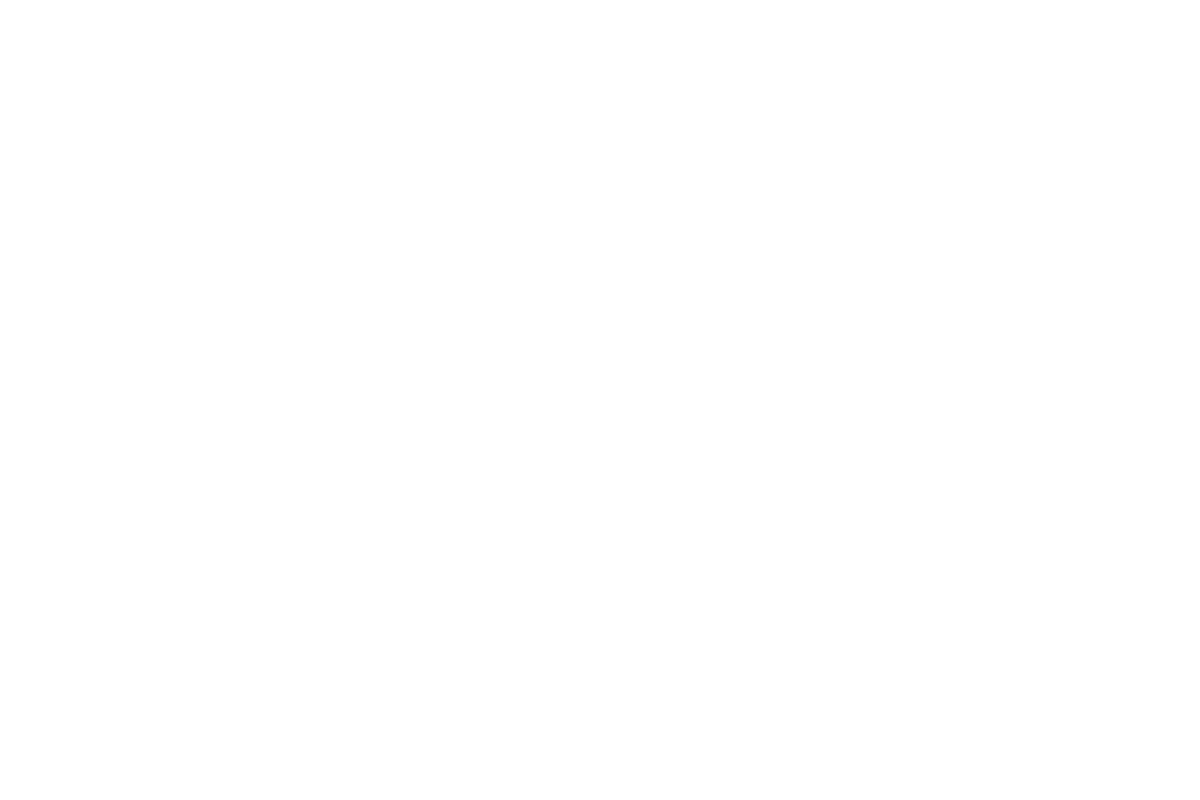

In [84]:
# Grafico Soluzione vx vs x ,vy vs y
fig,ax = plt.subplots(6,1, figsize=(9,6), sharex=True)
fig.subplots_adjust(hspace=0)
#ax.plot((r_solved[:,0]**2+r_solved[:,1]**2)**0.5 /1000, (r_solved[:,2]**2+r_solved[:,3]**2)**0.5 / 1000, 'o', markersize=0.5, color='darkorange')
ax[0].plot(time, r_solved[:,0]/1000, color='limegreen')
ax[0].set_ylabel('x [km]' )
ax[0].set_ylim(-1e9, 5e9)
ax[0].set_yticks((0, 4e9))
ax[1].plot(time, r_solved[:,1]/1000, color='orange')
ax[1].set_ylim(-1e9, 1e9)
ax[1].set_ylabel('y [km]' )
ax[2].plot(time, (r_solved[:,0]**2+r_solved[:,1]**2)**0.5 /1000, color='cornflowerblue')
ax[2].set_ylabel('r [km]' )
ax[2].set_ylim(-1e9, 5e9)
ax[2].set_yticks((0, 4e9))
ax[3].plot(time, r_solved[:,2]/1000, color='limegreen')
ax[3].set_ylabel(r'$v_x$ [km/s]' )
ax[4].plot(time, r_solved[:,3]/1000, color='orange')
ax[4].set_ylabel(r'$v_y$ [km/s]' )
ax[5].plot(time, (r_solved[:,2]**2+r_solved[:,3]**2)**0.5 /1000, color='cornflowerblue')
ax[5].set_ylabel('v [km/s]' )

ax[5].set_xlabel('t [s]' )

#ax.set_xlabel('r [km]' )
#ax.set_ylabel('v [km/s]' )

#ax.set_xscale('log')
#ax.set_yscale('log')
plt.show()

#### Oscillatore armornico

$$
\frac{d^2 x}{dt^2} = - \omega^2 x
$$

In [85]:
def oaeqn(xv, t, omega):
    """
    drdt_molla(xv, t, omega) derivate per equazine differenziale dell'oscillatore armonico
    xv : vettore con variabili r(x,dx/dt)
    t  : variabile tempo
    omega : omega = pulsazione propria dell'oscillatore armonica
    """
    dxdt = xv[1]
    dydt = -omega**2 * xv[0]
    
    return (dxdt, dydt)


# Array Tempi 
dt = 0.05 # s
otimes = np.arange(0, 20, dt)

# Pulsazione
omega = 1.0

# Condizioni iniziali
x0_1 = 5
x0_2 = 3
v0   = 0

oainit1 = (x0_1, v0)
oainit2 = (x0_2, v0)


# Soluzioni
sol1  = integrate.odeint(oaeqn, oainit1, otimes, args=(omega,)) 
sol2  = integrate.odeint(oaeqn, oainit2, otimes, args=(omega,))


# Grafico soluzioni
plt.plot(otimes, sol1[:,0], color='cornflowerblue')
plt.plot(otimes, sol2[:,0], color='orange')
plt.xlabel('time [s]')
plt.ylabel('x    [m]')
plt.show()

<IPython.core.display.Javascript object>


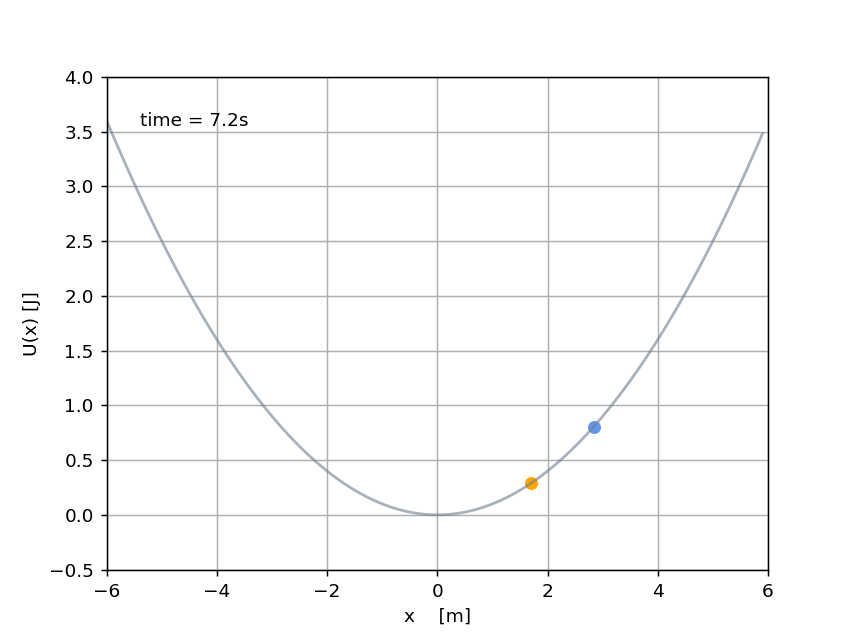

In [86]:
%matplotlib notebook
import matplotlib.animation as animation


# Grafico animato
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-6, 6), ylim=(-0.5, 4))

ax.grid()

line1, = ax.plot([], [], 'o', lw=2, color='cornflowerblue')
line2, = ax.plot([], [], 'o', lw=2, color='orange')
#llp = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line1.set_data([],[])
    line2.set_data([],[])
    time_text.set_text('')
    return line1, line2, time_text


def animateoa(i, ):
    
    xpos1 = sol1[i,0]
    xpos2 = sol2[i,0]
    
    ypos1 = 0.1*xpos1**2
    ypos2 = 0.1*xpos2**2
    

    line1.set_data(xpos1, ypos1)
    line2.set_data(xpos2, ypos2)
    time_text.set_text(time_template % (i*dt))
    return line1, line2, time_text



xvplot = np.arange(-6,6,0.1)
vplot = 0.1*xvplot**2

ani = animation.FuncAnimation(fig, animateoa, np.arange(1,len(sol1[:,0])), 
                              interval=25, blit=True, init_func=init)
plt.plot(xvplot,vplot, color='slategray', alpha=0.6)
plt.xlabel('x    [m]')
plt.ylabel('U(x) [J]')
plt.show()